In [2]:
from arcgis.tools import *

gis = GIS("http://deldev.maps.arcgis.com/", "deldev", "******")

In [3]:
sf_crimes = gis.content.search('Recent SF Crimes', 'feature service', max_items=1)[0]
sf_neighborhoods = gis.content.search('SF_Neighborhoods', 'feature service', max_items=1)[0]

{}
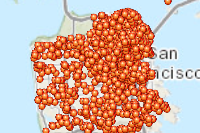

In [4]:
sf_crimes

In [5]:
sf_crime_svc = FeatureService(sf_crimes)

In [6]:
lyr = sf_crime_svc.layers[0]

In [7]:
df = lyr.query()

In [8]:
df.head()

,Address,Category,Date,DayOfWeek,Descript,FID,IncidntNum,PdDistrict,Resolution,Time,X,Y,geometry.x,geometry.y
0,800 Block of FILLMORE ST,BURGLARY,1401433200000,Friday,"BURGLARY OF FLAT, UNLAWFUL ENTRY",1,140452795,NORTHERN,NONE,1403685000000,-122.431575,37.777004,-13629020.630546,4547971.653411
1,2900 Block of 16TH ST,WEAPON LAWS,1401519600000,Saturday,EXHIBITING DEADLY WEAPON IN A THREATING MANNER,2,140453000,MISSION,NONE,1403655300000,-122.418719,37.765142,-13627589.440381,4546301.225239
2,1900 Block of IRVING ST,VANDALISM,1401433200000,Friday,"MALICIOUS MISCHIEF, BREAKING WINDOWS",3,140452739,TARAVAL,NONE,1403725200000,-122.478258,37.763401,-13634217.269279,4546056.002923
3,JEFFERSON ST / JONES ST,NON-CRIMINAL,1401519600000,Saturday,"AIDED CASE, MENTAL DISTURBED",4,140454064,CENTRAL,PSYCHOPATHIC CASE,1403698800000,-122.417449,37.808012,-13627448.042364,4552339.771571
4,100 Block of 9TH ST,ASSAULT,1401433200000,Friday,BATTERY,5,140451258,SOUTHERN,"ARREST, CITED",1403700000000,-122.413928,37.775554,-13627056.164360,4547767.513118


In [9]:
sf_neighborhoods_svc = FeatureService(sf_neighborhoods)

In [10]:
len(sf_neighborhoods_svc.layers)

1

{}
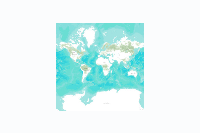

In [11]:
sf_neighborhoods

In [13]:

result = gis.tools.analysis.aggregate_points(sf_crimes, sf_neighborhoods_svc.layers[0], True, [], "Category", True, True);


In [14]:
agg_lyr = result['aggregated_layer'].to_df()

In [15]:
agg_lyr.head()

,AnalysisArea,DOMTAP,Join_ID,Majority_Category,Majority_Category_Percent,Minority_Category,Minority_Category_Percent,OBJECTID,OBJECTID_1,Point_Count,Shape_Area,Shape_Leng,Shape_Length,neighborho,geometry.rings
0,0.721483,0,1,LARCENY/THEFT,57.894737,FRAUD;MISSING PERSON;OTHER OFFENSES;SEX OFFENS...,2.631579,1,1,38,2996683.073670,11360.320284,11360.320077,Seacliff,"[[[-13634866.419, 4549507.830200002], [-136348..."
1,0.762869,0,2,LARCENY/THEFT,18.126888,"SEX OFFENSES, FORCIBLE",0.100705,2,2,993,3167344.791509,7913.857970,7913.857872,Haight Ashbury,"[[[-13629509.1614, 4546849.865000002], [-13629..."
2,1.375884,0,3,OTHER OFFENSES,21.344538,ARSON;DRIVING UNDER THE INFLUENCE;DRUNKENNESS;...,0.168067,3,3,595,5705599.529960,13645.759989,13645.759746,Outer Mission,"[[[-13631548.490600001, 4538288.987599999], [-..."
3,0.476863,0,4,LARCENY/THEFT,32.400000,BAD CHECKS;DRIVING UNDER THE INFLUENCE;FORGERY...,0.200000,4,4,500,1981574.969565,8987.906615,8987.905914,Russian Hill,"[[[-13627838.0032, 4552474.229599997], [-13627..."
4,0.896939,0,5,LARCENY/THEFT,25.498008,DISORDERLY CONDUCT;DRUG/NARCOTIC;LIQUOR LAWS;P...,0.398406,5,5,251,3721997.613599,8212.512452,8212.512474,Noe Valley,"[[[-13628352.9941, 4545100.743000001], [-13628..."


In [16]:
sf_neighborhoods_svc.layers[0].query().head()

,DOMTAP,FID,OBJECTID,Shape_Area,Shape_Leng,neighborho,geometry.rings
0,0,1,1,2996683.16834,11360.320284,Seacliff,"[[[-13634866.4190005, 4549507.83020665], [-136..."
1,0,2,2,3167344.84951,7913.857970,Haight Ashbury,"[[[-13629509.1613901, 4546849.86504009], [-136..."
2,0,3,3,5705599.50401,13645.759989,Outer Mission,"[[[-13631548.4905854, 4538288.98756025], [-136..."
3,0,4,4,1981575.03499,8987.906615,Russian Hill,"[[[-13627838.003211, 4552474.22959085], [-1362..."
4,0,5,5,3721997.50393,8212.512452,Noe Valley,"[[[-13628352.9941219, 4545100.74297739], [-136..."


In [18]:
from arcgis.viz import MapView
map = MapView()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [19]:
map

In [28]:
map.center = gis.tools.geocoder.find_best_match('San Francisco')

In [21]:
map.add_layer(sf_neighborhoods_svc.layers[0])

In [22]:
map.add_layer(result['aggregated_layer'])

In [23]:
summ = result['group_summary'].to_df()

In [24]:
summ[summ.Join_ID==3].sort('Point_Count',ascending=False)

,Category,Join_ID,OBJECTID,PercentCount,Point_Count
43,OTHER OFFENSES,3,44,21.344538,127
40,LARCENY/THEFT,3,41,14.453782,86
42,NON-CRIMINAL,3,43,12.100840,72
51,VEHICLE THEFT,3,52,10.756303,64
32,ASSAULT,3,33,9.075630,54
50,VANDALISM,3,51,6.386555,38
41,MISSING PERSON,3,42,5.042017,30
52,WARRANTS,3,53,4.537815,27
35,DRUG/NARCOTIC,3,36,2.857143,17
48,SUSPICIOUS OCC,3,49,2.521008,15


In [25]:
summ[summ.Point_Count>500]

,Category,Join_ID,OBJECTID,PercentCount,Point_Count
120,DRUG/NARCOTIC,7,121,11.661405,591
129,LARCENY/THEFT,7,130,23.500395,1191
132,NON-CRIMINAL,7,133,11.819258,599
133,OTHER OFFENSES,7,134,12.430939,630
289,LARCENY/THEFT,15,290,37.912952,723
343,LARCENY/THEFT,17,344,20.693890,674
347,OTHER OFFENSES,17,348,17.193737,560
552,LARCENY/THEFT,27,553,36.498379,788
620,LARCENY/THEFT,30,621,35.290148,1569
623,NON-CRIMINAL,30,624,13.427800,597


In [26]:
import pandas as pd

In [27]:
pd.merge(summ[summ.Point_Count>500], agg_lyr, how='inner', on="Join_ID")

,Category,Join_ID,OBJECTID_x,PercentCount,Point_Count_x,AnalysisArea,DOMTAP,Majority_Category,Majority_Category_Percent,Minority_Category,Minority_Category_Percent,OBJECTID_y,OBJECTID_1,Point_Count_y,Shape_Area,Shape_Leng,Shape_Length,neighborho,geometry.rings
0,DRUG/NARCOTIC,7,121,11.661405,591,0.644447,0,LARCENY/THEFT,23.500395,EXTORTION;FAMILY OFFENSES;GAMBLING,0.019732,7,7,5068,2676679.383528,7486.262301,7486.262242,Downtown/Civic Center,"[[[-13626497.7894, 4549820.729099996], [-13626..."
1,LARCENY/THEFT,7,130,23.500395,1191,0.644447,0,LARCENY/THEFT,23.500395,EXTORTION;FAMILY OFFENSES;GAMBLING,0.019732,7,7,5068,2676679.383528,7486.262301,7486.262242,Downtown/Civic Center,"[[[-13626497.7894, 4549820.729099996], [-13626..."
2,NON-CRIMINAL,7,133,11.819258,599,0.644447,0,LARCENY/THEFT,23.500395,EXTORTION;FAMILY OFFENSES;GAMBLING,0.019732,7,7,5068,2676679.383528,7486.262301,7486.262242,Downtown/Civic Center,"[[[-13626497.7894, 4549820.729099996], [-13626..."
3,OTHER OFFENSES,7,134,12.430939,630,0.644447,0,LARCENY/THEFT,23.500395,EXTORTION;FAMILY OFFENSES;GAMBLING,0.019732,7,7,5068,2676679.383528,7486.262301,7486.262242,Downtown/Civic Center,"[[[-13626497.7894, 4549820.729099996], [-13626..."
4,LARCENY/THEFT,15,290,37.912952,723,0.694022,0,LARCENY/THEFT,37.912952,EXTORTION;LIQUOR LAWS,0.052438,15,15,1907,2883203.497987,10002.735724,10002.737888,Financial District,"[[[-13625633.2432, 4548675.202200003], [-13626..."
5,LARCENY/THEFT,17,344,20.693890,674,1.730672,0,LARCENY/THEFT,20.693890,BAD CHECKS;SUICIDE,0.030703,17,17,3257,7183567.755511,10984.935038,10984.934853,Mission,"[[[-13628261.5525, 4543866.371200003], [-13628..."
6,OTHER OFFENSES,17,348,17.193737,560,1.730672,0,LARCENY/THEFT,20.693890,BAD CHECKS;SUICIDE,0.030703,17,17,3257,7183567.755511,10984.935038,10984.934853,Mission,"[[[-13628261.5525, 4543866.371200003], [-13628..."
7,LARCENY/THEFT,27,553,36.498379,788,1.516788,0,LARCENY/THEFT,36.498379,EMBEZZLEMENT;LIQUOR LAWS;STOLEN PROPERTY,0.046318,27,27,2159,6299405.451607,11039.210661,11039.210615,Western Addition,"[[[-13627978.4354, 4547394.4067], [-13628095.9..."
8,LARCENY/THEFT,30,621,35.290148,1569,2.111572,0,LARCENY/THEFT,35.290148,BRIBERY;FAMILY OFFENSES;STOLEN PROPERTY,0.022492,30,30,4446,8768622.752584,28835.502377,28835.501817,South of Market,"[[[-13624105.868099999, 4548464.102399997], [-..."
9,NON-CRIMINAL,30,624,13.427800,597,2.111572,0,LARCENY/THEFT,35.290148,BRIBERY;FAMILY OFFENSES;STOLEN PROPERTY,0.022492,30,30,4446,8768622.752584,28835.502377,28835.501817,South of Market,"[[[-13624105.868099999, 4548464.102399997], [-..."
